# Seminar 4. Support Vector Machine (SVM)

## Binary Classification Problem

Given $X$ is a **feature matrix**, $y$ is a **target**, 

and a **dataset** $\{x_i, y_i\}_{i=1}^K$, where $x_i \in \mathbb{R}^N$, $y_i \in C$, $C \in \{-1, 1\}$

Our goal is to find a function $f(x) = \hat{y} \sim y$

## Dataset with Outliers

#### Question

<details>
<summary>What outliers are?</summary>
    
An **outlier** is a data point that significantly differs from the rest of the dataset. It is an unusual observation that can result from measurement errors, rare events, or variability in data.
    
</details>

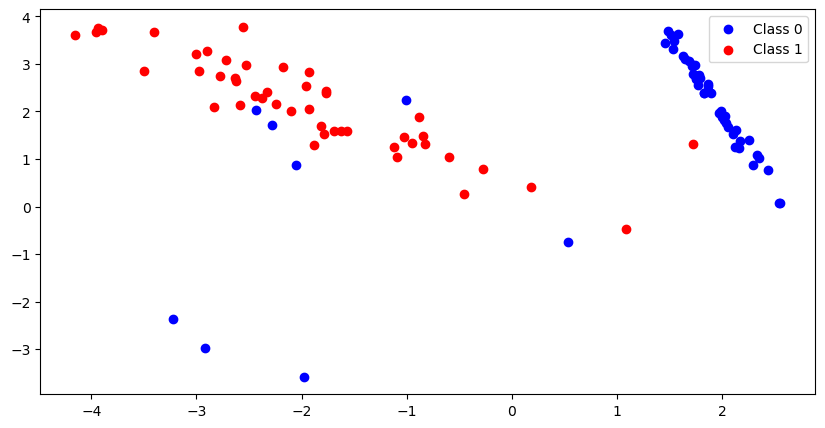

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=90, 
    n_features=2, 
    n_classes=2, 
    n_clusters_per_class=1, 
    n_redundant=0, 
    class_sep=2
)

# Add outliers near the decision boundary
outliers_X = np.random.uniform(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, size=(10, 2))
outliers_y = np.random.choice([0, 1], size=10)

X = np.vstack((X, outliers_X))
y = np.hstack((y, outliers_y))

plt.figure(figsize=(10, 5))

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label="Class 0")
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label="Class 1")

plt.legend()
plt.show()

#### Question

<details>
<summary>In Logistic Regression (LR) and Support Vector Machine (SVM), we create a hyperplane to separate classes. What is the main difference between these approaches?</summary>
   
**Logistic Regression** finds a hyperplane by **optimizing probabilities** using the sigmoid function and minimizing log-loss.
    
**SVM** finds a hyperplane by **maximizing the margin between classes**, using hinge loss to focus on the most important data points (support vectors).
    
</details>

## Logistic Regression (LR) Recap

**Logistic Regression** is a **probabilistic model** used for classification. 

It models the probability that a given input x belongs to class y = 1 using the sigmoid function:

$P(y=1|x) = \frac{1}{1 + \exp(-w^Tx)}$

The model is trained by minimizing the **logistic loss** (also called log-loss or cross-entropy loss):

$L(w) = \sum\limits_i \log(1 + \exp(-w^Tx_i y_i))$

This loss function **maximizes the likelihood** of correctly classifying points while allowing some misclassification based on probability estimates.

## Support Vector Machine (SVM)

**SVM** is a **geometric model** rather than a probabilistic one. 

Instead of modeling probabilities, it focuses on finding the optimal decision boundary that **maximizes the margin between classes**.

---

LR uses a smooth sigmoid function, while SVM relies on a **hard margin-based decision**:

$y = \text{sign}(w^Tx)$

Instead of probability outputs, SVM only cares about which side of the decision boundary a point lies.

---

Instead of logistic loss, SVM uses the **hinge loss**:

$L(w) = \sum\limits_i \max(0, 1 - w^Tx_iy_i)$

The hinge loss penalizes misclassifications more aggressively and encourages correct classifications to be at least 1 unit away from the decision boundary.

## Decision Boundaries

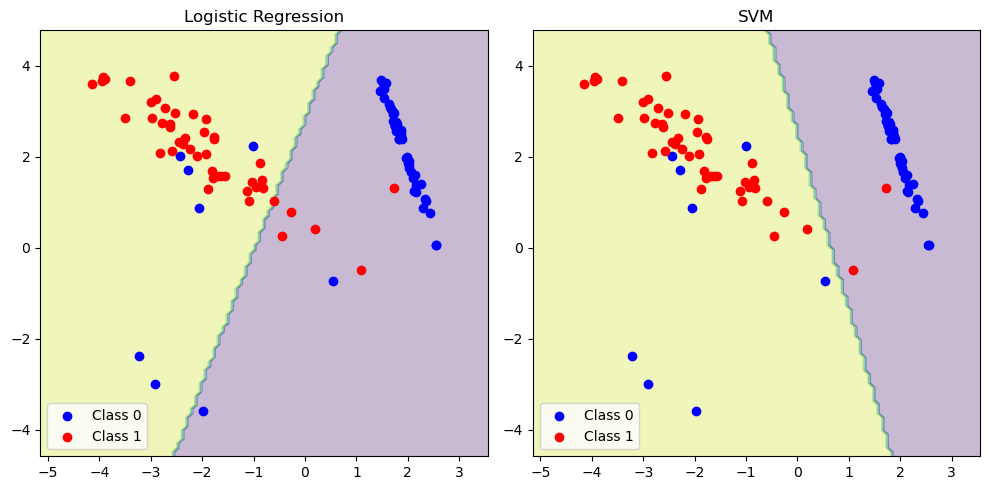

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

y_pred_lr = LogisticRegression().fit(X, y)
y_pred_svm = SVC(kernel='linear', C=1.0).fit(X, y)

def plot_decision_boundary(ax, model, X, y, title):
    
    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100),
        np.linspace(X[:,1].min()-1, X[:,1].max()+1, 100)
    )
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.3)
    ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label="Class 0")
    ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label="Class 1")
    ax.set_title(title)
    ax.legend()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_decision_boundary(axes[0], y_pred_lr, X, y, "Logistic Regression")
plot_decision_boundary(axes[1], y_pred_svm, X, y, "SVM")

plt.tight_layout()
plt.show()

## Support Vector Machine

Linear SVM __primal__ optimization problem can be formulated as

$$ \frac{1}{n} \sum_{i=1}^n \max(0, 1 - y_i (w x_i - b)) + \lambda ||w||_2 \to \min_w $$

This problem can be solved with gradient or sub-gradien methods.

Whereas __dual__ optimization problem formulates as follows:

$$
\sum_{i=1}^n c_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n y_i c_i (x_i \cdot x_j ) y_j c_j \to \max_{c_1,...,c_n} \\ \text{subject to} \\
\sum_{i=1}^n c_iy_i=0 \\
0 \leq c_i \leq \frac{1}{2n\lambda} \forall i
$$

where $w = \sum_{i=1}^n c_i y_i x_i$.

In this quadratic optimization problem we can use kernel trick: <br/>
introduce fucntion $K(x_i, x_j) = \phi (x_i) \phi (x_j)$ and change dot products in our optimization problem

Then we have 

$$
\sum_{i=1}^n c_i - \frac{1}{2} \sum_{i=1}^n \sum_{j=1}^n y_i c_i K(x_i, x_j) y_j c_j \to \max_{c_1,...,c_n} \\
\text{subject to} \\
\sum_{i=1}^n c_iy_i=0 \\
0 \leq c_i \leq \frac{1}{2n\lambda} \forall i
$$

$w = \sum_{i=1}^n c_i y_i \phi(x_i)$

In quadratic programming we can straightforwardly add kernel function, but it is not that simple, if we want to use gradient algorithms.

However primal optimization problem with kernels can be formulated like (see [Olivier Chapelle, 2006](https://www.cs.utah.edu/~piyush/teaching/svm-solving-primal.pdf)):

$f(x) = \sum_{i=1}^n \beta_i K(x_i, x)$

$K: K_{i,j} = K(x_i, x_j)$

$ \lambda \vec{\beta^T} K \vec{\beta} + \sum_{i=1}^n L(y_i, K_i^T \vec{\beta}) \to \min_{\vec{\beta}}$

where L is Hinge loss: $L(y_i, K_i^T \vec{\beta}) = \max(0, 1 - y_i (K_i^T \vec{\beta}))$

### Custom implementation using SGD

Let's code SVM with primal optimization problem and kernels on pytorch

Some parts were taken from [this notebook](https://github.com/nikhilraghava/PyTorch-SVM/blob/master/SVM%20-%20PyTorch.ipynb) 

In [3]:
import torch
import torch.optim as optim

from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, ClassifierMixin

def hinge_loss(scores, labels):
    '''Mean loss for batch of objects
    '''
    assert len(scores.shape) == 1
    assert len(labels.shape) == 1
    return torch.clamp(1 - scores * labels, min=0) ### YOUR CODE HERE

class SVM(BaseEstimator, ClassifierMixin):
    @staticmethod
    def linear(x_1, x_2):
        '''Computes linear kernel for batches of objects
        
        Args:
            x_1: array shaped `(#samples_1, #features)`
            x_2: array shaped `(#samples_2, #features)`
        Returns:
            kernel function values for all pairs of samples from x_1 and x_2
            shaped `(#samples_1, #samples_2)`
        '''
        return x_1 @ x_2.T ### YOUR CODE HERE
    
    def __init__(
        self,
        lr: float=1e-3,
        epochs: int=2,
        batch_size: int=64,
        lmbd: float=1e-4,
        kernel_function=None,
        verbose: bool=False,
    ):
        self.lr = lr
        self.epochs = epochs
        self.batch_size = batch_size
        self.lmbd = lmbd
        self.kernel_function = kernel_function or SVM.linear
        self.verbose = verbose
        self.fitted = False

    def __repr__(self):
        return 'SVM model, fitted: {self.fitted}'

    def fit(self, X, Y):
        assert (np.abs(Y) == 1).all()
        
        n_obj = len(X)
        X, Y = torch.FloatTensor(X), torch.FloatTensor(Y)

        self.betas = torch.full((n_obj, 1), fill_value=0.001, dtype=X.dtype, requires_grad=True)
        self.bias = torch.zeros(1, requires_grad=True) # I've also add bias to the model
        
        optimizer = optim.SGD((self.betas, self.bias), lr=self.lr)
        
        for epoch in range(self.epochs):
            perm = torch.randperm(n_obj)  # Generate a set of random numbers of length: sample size
            sum_loss = 0.                 # Loss for each epoch
            for i in range(0, n_obj, self.batch_size):
                batch_inds = perm[i:i + self.batch_size]
                
                x_batch = X[batch_inds]   # Pick random samples by iterating over random permutation
                y_batch = Y[batch_inds]   # Pick the correlating class
                
                k_batch = self.kernel_function(x_batch, X)
                
                optimizer.zero_grad()     # Manually zero the gradient buffers of the optimizer
                
                preds = k_batch @ self.betas + self.bias ### YOUR CODE HERE # Compute the output by doing a forward pass
                preds = preds.flatten()
                
                selected_betas = self.betas[batch_inds]
                loss = self.lmbd * selected_betas.T @ k_batch @ self.betas + hinge_loss(preds, y_batch).mean()
                
                loss.backward()           # Backpropagation
                optimizer.step()          # Optimize and adjust weights

                sum_loss += loss.item()   # Add the loss

            if self.verbose: print("Epoch " + str(epoch) + ", Loss: " + str(sum_loss / self.batch_size))

        self.X = X
        self.fitted = True
        return self

    def predict_scores(self, batch):
        with torch.no_grad():
            if isinstance(batch, np.ndarray):
                batch = torch.from_numpy(batch).float()
            else:
                batch = batch.float()
                
            K = self.kernel_function(batch, self.X)
            return K @ self.betas + self.bias ### YOUR CODE HERE

    def predict(self, batch):
        scores = self.predict_scores(batch).detach().numpy().flatten()
        answers = np.full(len(batch), -1, dtype=np.int64)
        answers[scores > 0] = 1
        return answers

In [4]:
model = SVM(epochs=2, verbose=True)

y[y == 0] = -1
model.fit(X, y)

predictions = model.predict(X)
accuracy_score(y, predictions)

Epoch 0, Loss: 0.01618627831885533
Epoch 1, Loss: 0.004896826460026205


0.94

### Playing with `sklearn`'s implementation

[original post](https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html)

In [5]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1e10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

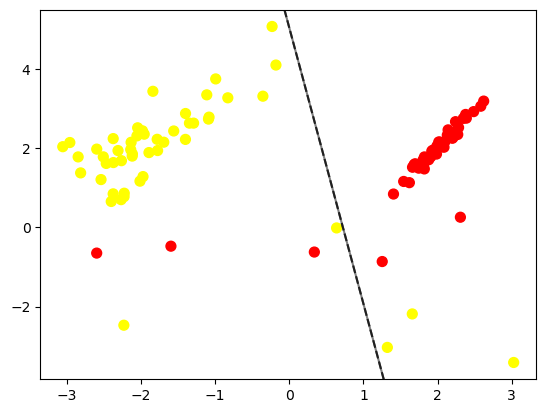

In [8]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

In [7]:
model.support_vectors_

array([[ 2.10006281,  1.84285131],
       [ 2.78371988, -0.21120338],
       [-4.36115081,  3.10401116],
       [-2.15887644, -0.6268089 ],
       [ 0.77876644,  0.0928331 ],
       [-0.16654967, -0.05306739],
       [-2.31907595, -2.49282179],
       [ 2.00916392,  1.86026561]])

In [9]:
model.support_vectors_

array([[ 1.93364917,  1.86648806],
       [ 1.92141143,  1.93191479],
       [ 1.98447605,  1.85455072],
       [ 2.24092514,  2.67343963],
       [-1.59361063, -0.47466996],
       [ 0.33863631, -0.62306887],
       [ 1.25339772, -0.86298388],
       [-2.59373175, -0.6493504 ],
       [-0.82701819,  3.27713836],
       [-0.17865365,  4.10579401],
       [-1.39800541,  2.22560898],
       [-0.35436845,  3.3181191 ],
       [ 1.65837528, -2.18764147],
       [ 1.32256543, -3.03405708],
       [ 3.02461741, -3.41526458]])

### Example with kernel from sklearn

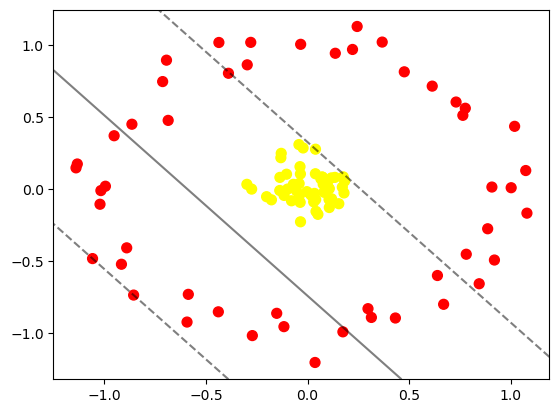

In [8]:
from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [9]:
clf = SVC(kernel='rbf', C=1e6)
clf.fit(X, y)

SVC(C=1000000.0)

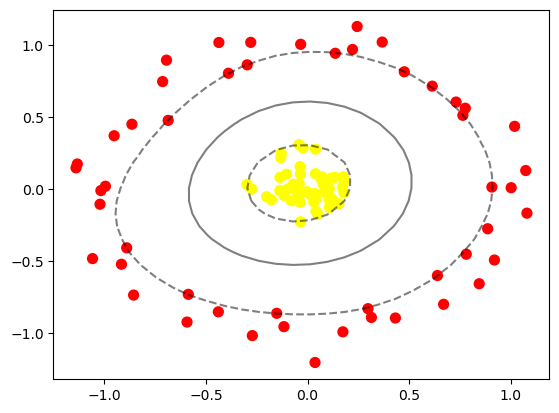

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

### Different margins for nonseparable cases

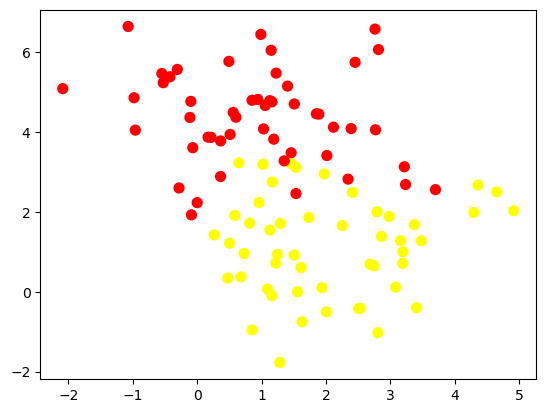

In [11]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

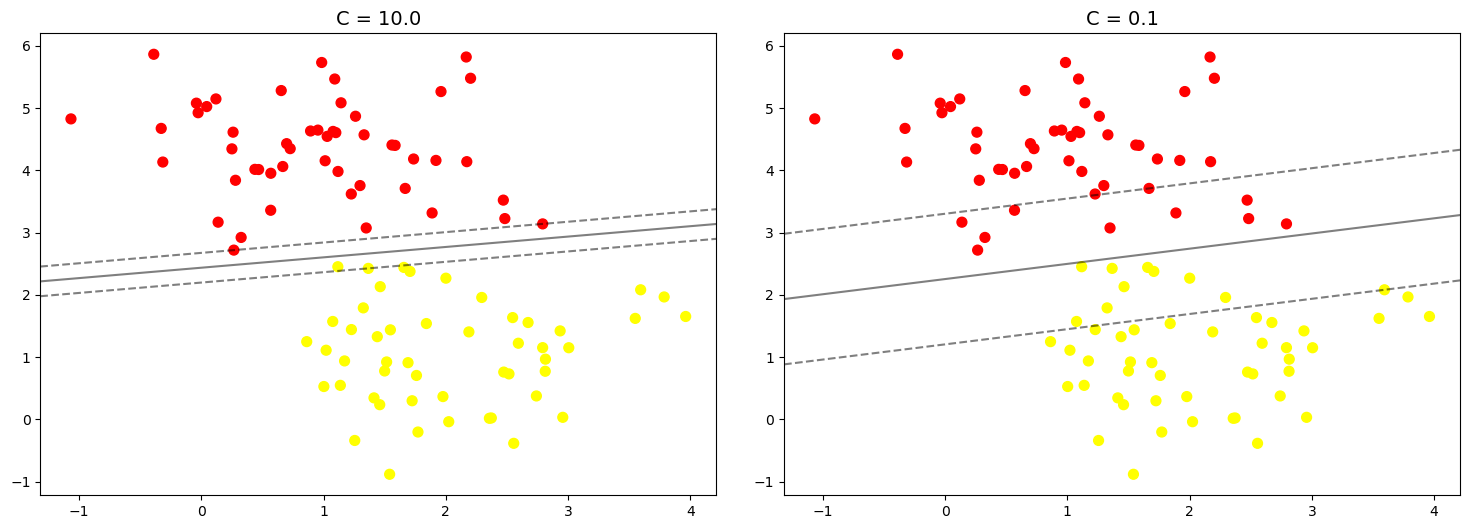

In [12]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

#### Question

<details>
<summary>Can we use SVM to solve regression tasks? If yes, how does it work?</summary>
    
Yes, SVM can be used for regression through Support Vector Regression (SVR). Instead of finding a hyperplane to separate classes, SVR finds a function that best fits the data while allowing some deviations within an ε-margin. It uses **ε-insensitive loss** and can handle non-linear regression with kernel tricks.
    
</details>

## Key Modifications in SVM to Solve Regression

### Change the Optimization Objective

**SVM for Classification**: Finds a hyperplane that maximizes the margin between two classes while minimizing classification errors.

**SVR for Regression**: Finds a function (hyperplane) that fits the data while allowing some deviations within a tolerance margin (ε-insensitive zone).

### Replace Hinge Loss with ε-Insensitive Loss

**ε-Insensitive loss** in SVR (regression):

- No penalty if the predicted value is within ε of the actual value.
- Penalty increases for predictions that fall outside the ε margin.
- This helps in ignoring small variations and focusing on the overall trend.

### Introduce Slack Variables for Flexibility

In **classification SVM**, slack variables (ξ) allow misclassification in soft-margin SVM.

In **SVR**, two slack variables (ξ+ and ξ-) allow deviation above and below the ε-tolerance.

### Modify the Optimization Problem in SVR

For classification, SVM **maximizes the margin** between two classes while **minimizing classification errors**. The objective function is:

$\min \frac{1}{2} ||w||^2 + C \sum \xi_i$

subject to:

$y_i (w \cdot x_i + b) \geq 1 - \xi_i, \quad \xi_i \geq 0$

where:  
- $w$ and $b$ define the decision boundary.  
- $\xi_i$ are **slack variables** allowing misclassified points.  
- $C$ controls the trade-off between maximizing the margin and minimizing misclassification.  

For regression, instead of **separating classes**, we aim to **find a function that approximates the target values** while allowing small deviations within an **ε-margin**. The new objective function is:

$\min \frac{1}{2} ||w||^2 + C \sum (\xi_i^+ + \xi_i^-)$

subject to:

$|y_i - (w \cdot x_i + b)| \leq \epsilon + \xi_i^+, \quad \xi_i^+, \xi_i^- \geq 0$

where:  
- $\epsilon$ defines a **tolerance margin**, meaning predictions within \( \epsilon \) of the true value are **not penalized**.  
- $\xi_i^+$ and $\xi_i^-$ are **slack variables** allowing deviations **above and below** the $\epsilon$-margin.  
- $C$ controls the balance between **model complexity** and **error tolerance**.

Next step is to write own Regression model using Support Vectors. [Here is the idea](https://stats.stackexchange.com/questions/82044/how-does-support-vector-regression-work-intuitively)